<a href="https://colab.research.google.com/github/Heterotic-Research/sns-phc-303/blob/main/psd_lif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

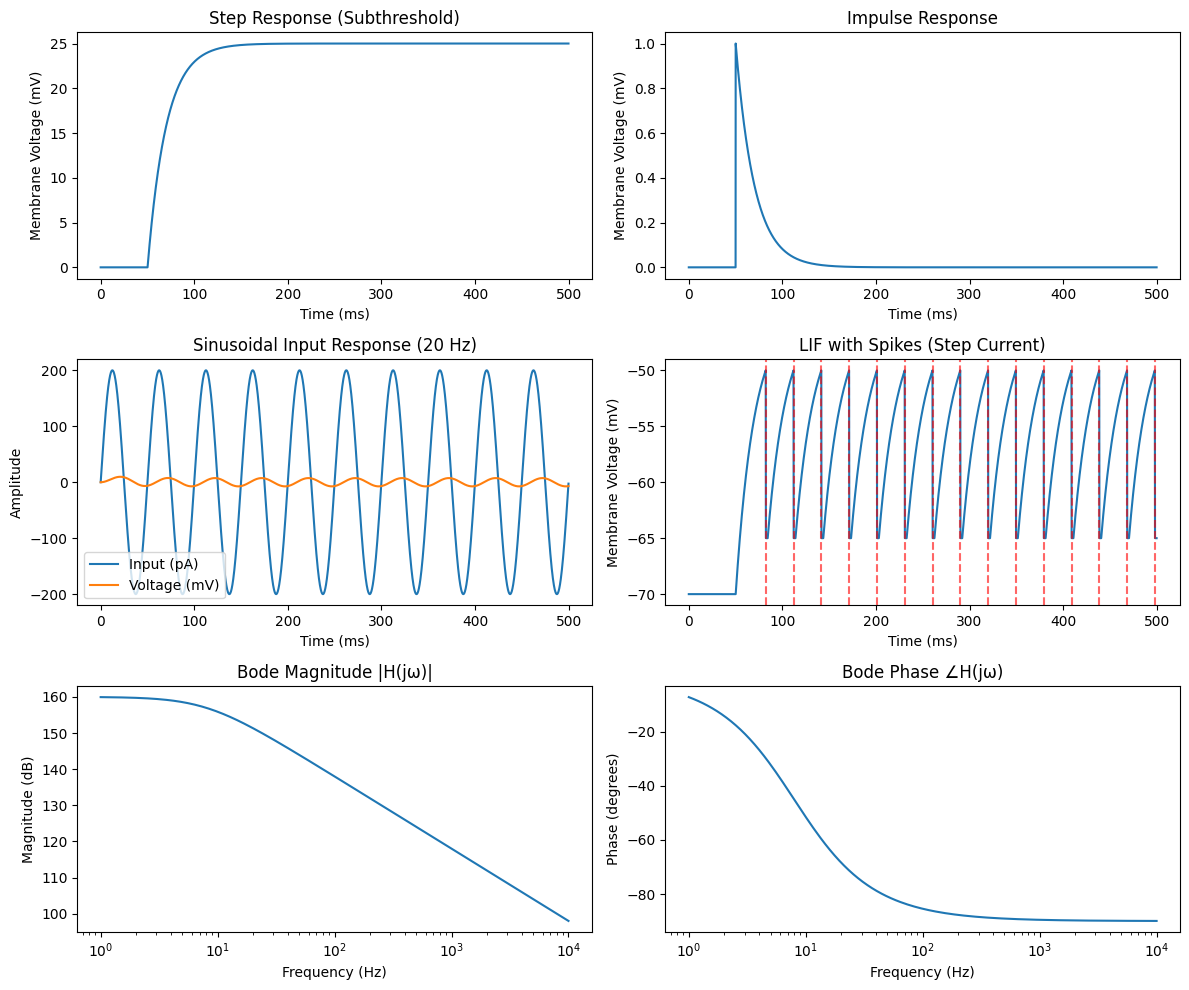

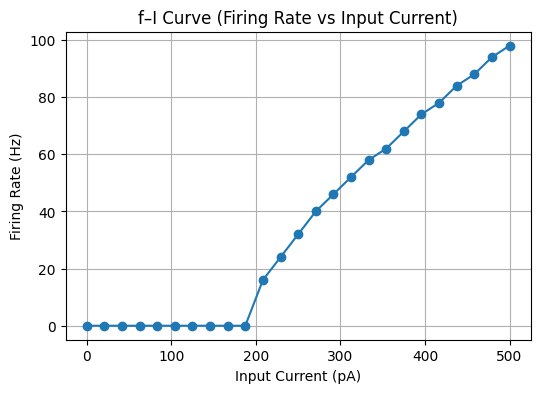

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# LIF neuron parameters
# -------------------------------
C = 200e-12         # Capacitance (F)
R = 100e6           # Resistance (Ohm)
tau_m = R * C       # Membrane time constant (s)
E_L = -70e-3        # Leak reversal (V)
V_th = -50e-3       # Threshold (V)
V_reset = -65e-3    # Reset potential (V)
t_ref = 2e-3        # Refractory period (s)

# Simulation parameters
dt = 1e-4           # Time step (s)
T = 0.5             # Total time (s)
t = np.arange(0, T, dt)

# -------------------------------
# Input currents
# -------------------------------
I_step = 250e-12 * (t > 0.05)      # Step current after 50 ms
I_impulse = np.zeros_like(t)
I_impulse[500] = 2e-9              # Impulse at 50 ms
I_sine = 200e-12 * np.sin(2 * np.pi * 20 * t)  # 20 Hz sine wave

# Choose input for spiking simulation
I_in = I_step

# -------------------------------
# Subthreshold LIF dynamics
# -------------------------------
def lif_subthreshold(I, tau_m, R, v0=0):
    """Simulate subthreshold membrane potential response (no spikes)."""
    v = np.zeros_like(I)
    v[0] = v0
    for i in range(1, len(I)):
        dv = (-v[i-1] + R*I[i-1]) * (dt / tau_m)
        v[i] = v[i-1] + dv
    return v

v_step = lif_subthreshold(I_step, tau_m, R)
v_impulse = lif_subthreshold(I_impulse, tau_m, R)
v_sine = lif_subthreshold(I_sine, tau_m, R)

# -------------------------------
# LIF with threshold and reset
# -------------------------------
def lif_spiking(I, tau_m, R, E_L, V_th, V_reset, t_ref):
    v = np.zeros_like(I)
    v[0] = E_L
    spike_times = []
    refrac_time = 0
    for i in range(1, len(I)):
        if refrac_time > 0:
            v[i] = V_reset
            refrac_time -= dt
            continue
        dv = (-(v[i-1]-E_L) + R*I[i-1]) * (dt / tau_m)
        v[i] = v[i-1] + dv
        if v[i] >= V_th:
            v[i] = V_reset
            spike_times.append(t[i])
            refrac_time = t_ref
    return v, spike_times

v_spike, spikes = lif_spiking(I_in, tau_m, R, E_L, V_th, V_reset, t_ref)

# -------------------------------
# Frequency response (Bode plot)
# -------------------------------
omega = np.logspace(0, 4, 200) * 2 * np.pi  # 1 Hz – 10 kHz
H = R / (1 + 1j * omega * tau_m)
mag = np.abs(H)
phase = np.angle(H, deg=True)

# -------------------------------
# Plot results
# -------------------------------
plt.figure(figsize=(12, 10))

# Step response
plt.subplot(3, 2, 1)
plt.plot(t*1e3, v_step*1e3)
plt.title("Step Response (Subthreshold)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Impulse response
plt.subplot(3, 2, 2)
plt.plot(t*1e3, v_impulse*1e3)
plt.title("Impulse Response")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Sinusoidal response
plt.subplot(3, 2, 3)
plt.plot(t*1e3, I_sine*1e12, label="Input (pA)")
plt.plot(t*1e3, v_sine*1e3, label="Voltage (mV)")
plt.title("Sinusoidal Input Response (20 Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()

# Spiking simulation
plt.subplot(3, 2, 4)
plt.plot(t*1e3, v_spike*1e3)
for s in spikes:
    plt.axvline(s*1e3, color='r', linestyle='--', alpha=0.6)
plt.title("LIF with Spikes (Step Current)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Bode magnitude
plt.subplot(3, 2, 5)
plt.semilogx(omega/(2*np.pi), 20*np.log10(mag))
plt.title("Bode Magnitude |H(jω)|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Bode phase
plt.subplot(3, 2, 6)
plt.semilogx(omega/(2*np.pi), phase)
plt.title("Bode Phase ∠H(jω)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")

plt.tight_layout()
plt.show()

# -------------------------------
# F–I curve (optional)
# -------------------------------
def firing_rate(I0_array):
    rates = []
    for I0 in I0_array:
        I_drive = np.full_like(t, I0)
        _, spikes = lif_spiking(I_drive, tau_m, R, E_L, V_th, V_reset, t_ref)
        rates.append(len(spikes) / T)
    return rates

I_range = np.linspace(0, 500e-12, 25)
rates = firing_rate(I_range)

plt.figure(figsize=(6,4))
plt.plot(I_range*1e12, rates, 'o-')
plt.title("f–I Curve (Firing Rate vs Input Current)")
plt.xlabel("Input Current (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.grid(True)
plt.show()


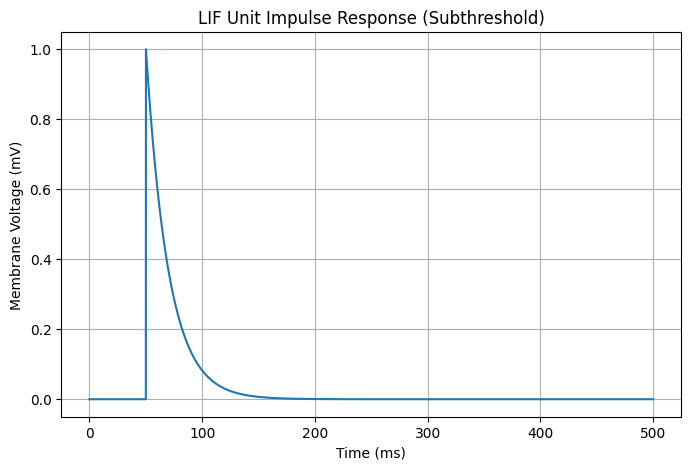

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 't' and 'v_impulse' are available from a previous cell
# If not, you would need to recalculate them here:
# dt = 1e-4
# T = 0.5
# t = np.arange(0, T, dt)
# R = 100e6
# C = 200e-12
# tau_m = R * C
# I_impulse = np.zeros_like(t)
# I_impulse[500] = 2e-9
#
# def lif_subthreshold(I, tau_m, R, v0=0):
#     v = np.zeros_like(I)
#     v[0] = v0
#     for i in range(1, len(I)):
#         dv = (-v[i-1] + R*I[i-1]) * (dt / tau_m)
#         v[i] = v[i-1] + dv
#     return v
#
# v_impulse = lif_subthreshold(I_impulse, tau_m, R)


plt.figure(figsize=(8, 5))
plt.plot(t*1e3, v_impulse*1e3)
plt.title("LIF Unit Impulse Response (Subthreshold)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.grid(True)
plt.show()

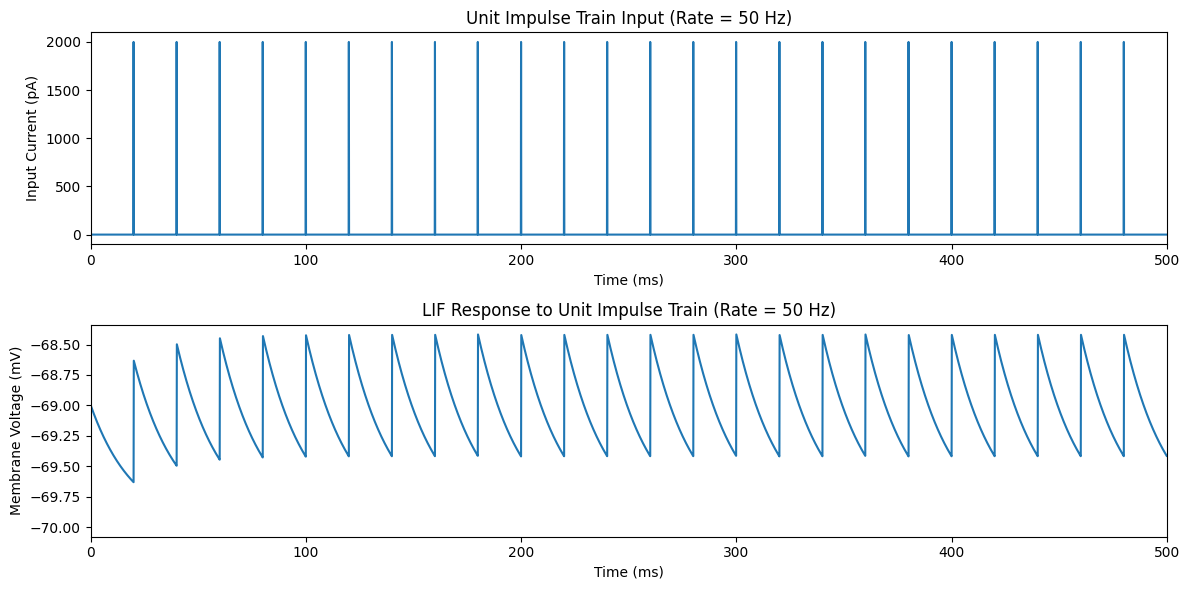

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming LIF neuron parameters and simulation parameters (dt, T, t) are available
# from previous cells. If not, they would need to be defined here.
# C = 200e-12         # Capacitance (F)
# R = 100e6           # Resistance (Ohm)
# tau_m = R * C       # Membrane time constant (s)
# E_L = -70e-3        # Leak reversal (V)
# V_th = -50e-3       # Threshold (V)
# V_reset = -65e-3    # Reset potential (V)
# t_ref = 2e-3        # Refractory period (s)
# dt = 1e-4           # Time step (s)
# T = 0.5             # Total time (s)
# t = np.arange(0, T, dt)

# Assuming the lif_spiking function is available from a previous cell.
# If not, it would need to be defined here.
# def lif_spiking(I, tau_m, R, E_L, V_th, V_reset, t_ref):
#     v = np.zeros_like(I)
#     v[0] = E_L
#     spike_times = []
#     refrac_time = 0
#     for i in range(1, len(I)):
#         if refrac_time > 0:
#             v[i] = V_reset
#             refrac_time -= dt
#             continue
#         dv = (-(v[i-1]-E_L) + R*I[i-1]) * (dt / tau_m)
#         v[i] = v[i-1] + dv
#         if v[i] >= V_th:
#             v[i] = V_reset
#             spike_times.append(t[i])
#             refrac_time = t_ref
#     return v, spike_times


# -------------------------------
# Unit impulse train response
# -------------------------------

# Define the rate of the impulse train (Hz)
r = 50  # Example rate: 50 Hz

# Generate a unit impulse train
I_impulse_train = np.zeros_like(t)
# Calculate the time interval between impulses
impulse_interval = 1.0 / r
# Find the indices where impulses should occur
impulse_indices = np.arange(0, T, impulse_interval) / dt
impulse_indices = impulse_indices.astype(int)
# Ensure indices are within the bounds of the time array
impulse_indices = impulse_indices[impulse_indices < len(t)]

# Set the impulse amplitude. We'll use a value that provides a noticeable response.
# The exact value might need adjustment depending on the desired effect.
impulse_amplitude = 2e-9 # Same amplitude as the single impulse used before

I_impulse_train[impulse_indices] = impulse_amplitude

# Simulate the LIF neuron response to the impulse train
v_impulse_train, spikes_impulse_train = lif_spiking(I_impulse_train, tau_m, R, E_L, V_th, V_reset, t_ref)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t*1e3, I_impulse_train*1e12)
plt.title(f"Unit Impulse Train Input (Rate = {r} Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Input Current (pA)")
plt.xlim([0, T*1e3])


plt.subplot(2, 1, 2)
plt.plot(t*1e3, v_impulse_train*1e3)
for s in spikes_impulse_train:
    plt.axvline(s*1e3, color='r', linestyle='--', alpha=0.6)
plt.title(f"LIF Response to Unit Impulse Train (Rate = {r} Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.xlim([0, T*1e3])


plt.tight_layout()
plt.show()

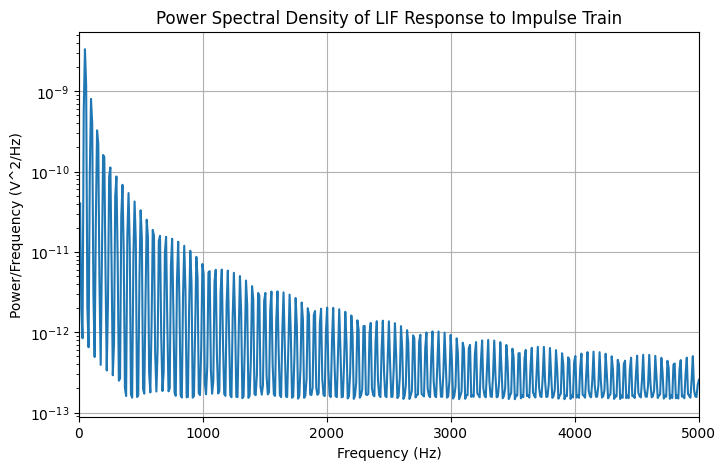


This plot shows how the power of the LIF neuron's voltage response is distributed across different frequencies.
Peaks in the PSD indicate dominant frequencies in the signal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Assuming 't', 'v_impulse_train', and 'dt' are available from previous cells
# If not, you would need to recalculate them or load them here.

# -------------------------------
# Power Spectral Analysis of LIF Response
# -------------------------------

# Calculate the Power Spectral Density (PSD) using Welch's method
# nperseg: Length of each segment. Choosing a value that balances frequency resolution and variance.
# fs: Sampling frequency (1/dt)
f_welch, Pxx_welch = welch(v_impulse_train, fs=1/dt, nperseg=1024)

# Plot the Power Spectral Density
plt.figure(figsize=(8, 5))
plt.semilogy(f_welch, Pxx_welch)
plt.title("Power Spectral Density of LIF Response to Impulse Train")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (V^2/Hz)")
plt.grid(True)
plt.xlim([0, 1/(2*dt)]) # Limit to Nyquist frequency
plt.show()

print("\nThis plot shows how the power of the LIF neuron's voltage response is distributed across different frequencies.")
print("Peaks in the PSD indicate dominant frequencies in the signal.")

# Optional: Direct method using the squared magnitude of the Fourier Transform
# freq_direct = np.fft.fftfreq(len(v_impulse_train), dt)
# Pxx_direct = (np.abs(np.fft.fft(v_impulse_train))**2) / (len(v_impulse_train) * (1/dt))
#
# plt.figure(figsize=(8, 5))
# plt.semilogy(freq_direct[:len(freq_direct)//2], Pxx_direct[:len(Pxx_direct)//2])
# plt.title("Power Spectral Density (Direct Method)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Power/Frequency (V^2/Hz)")
# plt.grid(True)
# plt.xlim([0, 1/(2*dt)])
# plt.show()

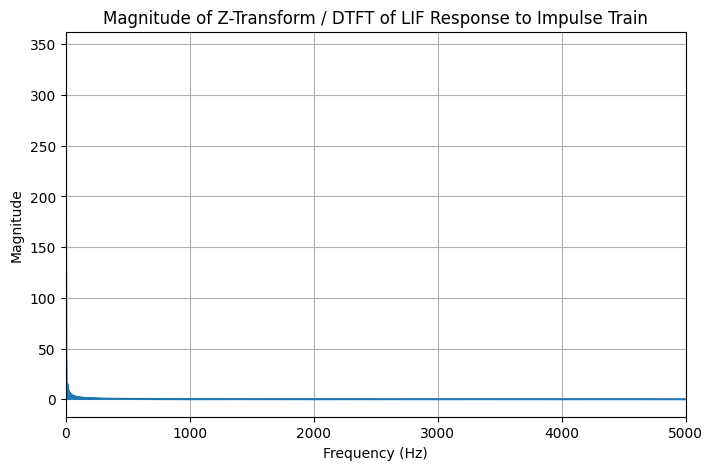


Note: Plotting the full Z-transform in the complex z-plane is not standard for visualizing the frequency content of a signal.
This plot shows the magnitude of the Discrete-Time Fourier Transform (DTFT), which is the Z-transform evaluated on the unit circle.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Assuming 'v_impulse_train' and 'dt' are available from previous cells
# If not, you would need to recalculate them or load them here.

# Calculate the frequency response from the Z-transform (using freqz)
# freqz computes the frequency response of a digital filter, which is related to the Z-transform
# We are essentially looking at the DTFT of the impulse response.
# The 'b' and 'a' parameters for freqz are the numerator and denominator coefficients of the filter's transfer function in the z-domain.
# For a simple impulse response (like v_impulse_train), we can treat it as the impulse response of a filter.
# So, the numerator coefficients 'b' are the values of v_impulse_train, and the denominator 'a' is just [1].

b = v_impulse_train
a = [1]

# Calculate the frequency response
# worN specifies the frequencies at which to evaluate the response.
# We'll use a sufficient number of points for a smooth plot.
w, h = freqz(b, a, worN=np.linspace(0, np.pi, 1000))

# Convert angular frequency (radians/sample) to Hz
frequencies_z = w * (0.5 / np.pi) * (1/dt) # Convert from radians/sample to Hz

# Plot the magnitude response
plt.figure(figsize=(8, 5))
plt.plot(frequencies_z, np.abs(h))
plt.title("Magnitude of Z-Transform / DTFT of LIF Response to Impulse Train")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim([0, 1/(2*dt)]) # Limit to Nyquist frequency
plt.show()

print("\nNote: Plotting the full Z-transform in the complex z-plane is not standard for visualizing the frequency content of a signal.")
print("This plot shows the magnitude of the Discrete-Time Fourier Transform (DTFT), which is the Z-transform evaluated on the unit circle.")

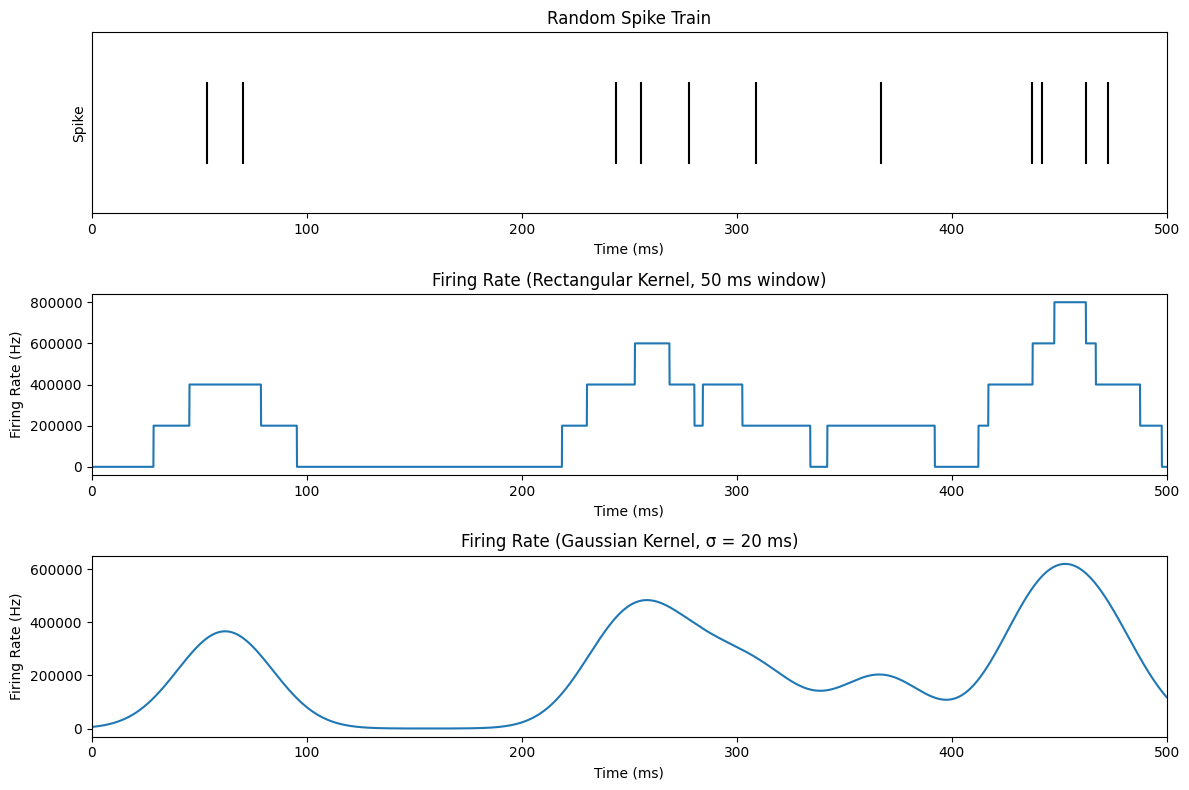

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Assuming 't' and 'dt' are available from previous cells
# If not, you would need to recalculate them here:
dt = 1e-4           # Time step (s)
T = 0.5             # Total time (s)
t = np.arange(0, T, dt)

# -------------------------------
# Random Spike Train Generation
# -------------------------------

# Generate a random spike train (e.g., Poisson-like)
# Let's assume an average firing rate (e.g., 20 Hz) for the random train
average_rate = 20 # Hz
probability_of_spike = average_rate * dt # Probability of a spike in a small time bin

# Create a random array and set spike times where random value is less than probability
random_spike_train = np.random.rand(len(t)) < probability_of_spike
random_spike_train = random_spike_train.astype(float) # Convert boolean to float (0s and 1s)

# -------------------------------
# Firing Rate Calculation
# -------------------------------

# Define kernels for convolution
# Rectangular kernel
rect_kernel_size_ms = 50 # milliseconds
rect_kernel_size_bins = int(rect_kernel_size_ms * 1e-3 / dt)
# Create a rectangular kernel with sum normalized to 1 for proper rate estimation
rect_kernel = np.ones(rect_kernel_size_bins) / (rect_kernel_size_bins * dt)

# Gaussian kernel
gaussian_sigma_ms = 20 # milliseconds
gaussian_sigma_bins = gaussian_sigma_ms * 1e-3 / dt
# Create a Gaussian kernel
# The size of the Gaussian window should be large enough to capture the kernel
# We'll use 5 times the standard deviation on each side as a common practice
gaussian_window_bins = int(gaussian_sigma_bins * 5)
gaussian_kernel = np.exp(-0.5 * (np.arange(-gaussian_window_bins, gaussian_window_bins+1) / gaussian_sigma_bins)**2)
# Normalize the Gaussian kernel so its integral is 1 for rate estimation
gaussian_kernel /= np.sum(gaussian_kernel * dt)


# Convolve the spike train with the kernels to get firing rate
firing_rate_rect = np.convolve(random_spike_train, rect_kernel, mode='same') * (1/dt) # Multiply by 1/dt to convert from count to rate
firing_rate_gaussian = np.convolve(random_spike_train, gaussian_kernel, mode='same') * (1/dt) # Multiply by 1/dt to convert from count to rate

# Alternatively, using scipy's gaussian_filter1d which handles convolution efficiently
# firing_rate_gaussian_scipy = gaussian_filter1d(random_spike_train.astype(float), sigma=gaussian_sigma_bins, mode='nearest') * (1/dt)
# Note: scipy's filter is typically normalized differently, often to sum=1. Need to adjust for rate.
# Let's stick with the manual convolution and normalized kernel for clarity regarding rate units.

# -------------------------------
# Plotting
# -------------------------------

plt.figure(figsize=(12, 8))

# Plot the original random spike train
plt.subplot(3, 1, 1)
# To visualize spikes, we can plot a line at the time of each spike
spike_times_random = t[random_spike_train > 0.5] # Get times where spike_train is approximately 1
plt.eventplot(spike_times_random * 1e3, lineoffsets=1, linelengths=0.5, color='k')
plt.title("Random Spike Train")
plt.xlabel("Time (ms)")
plt.ylabel("Spike")
plt.yticks([]) # Hide y-axis ticks as it's a binary event plot
plt.xlim([0, T*1e3])


# Plot firing rate with rectangular kernel
plt.subplot(3, 1, 2)
plt.plot(t*1e3, firing_rate_rect)
plt.title(f"Firing Rate (Rectangular Kernel, {rect_kernel_size_ms} ms window)")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.xlim([0, T*1e3])


# Plot firing rate with Gaussian kernel
plt.subplot(3, 1, 3)
plt.plot(t*1e3, firing_rate_gaussian)
plt.title(f"Firing Rate (Gaussian Kernel, σ = {gaussian_sigma_ms} ms)")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.xlim([0, T*1e3])


plt.tight_layout()
plt.show()

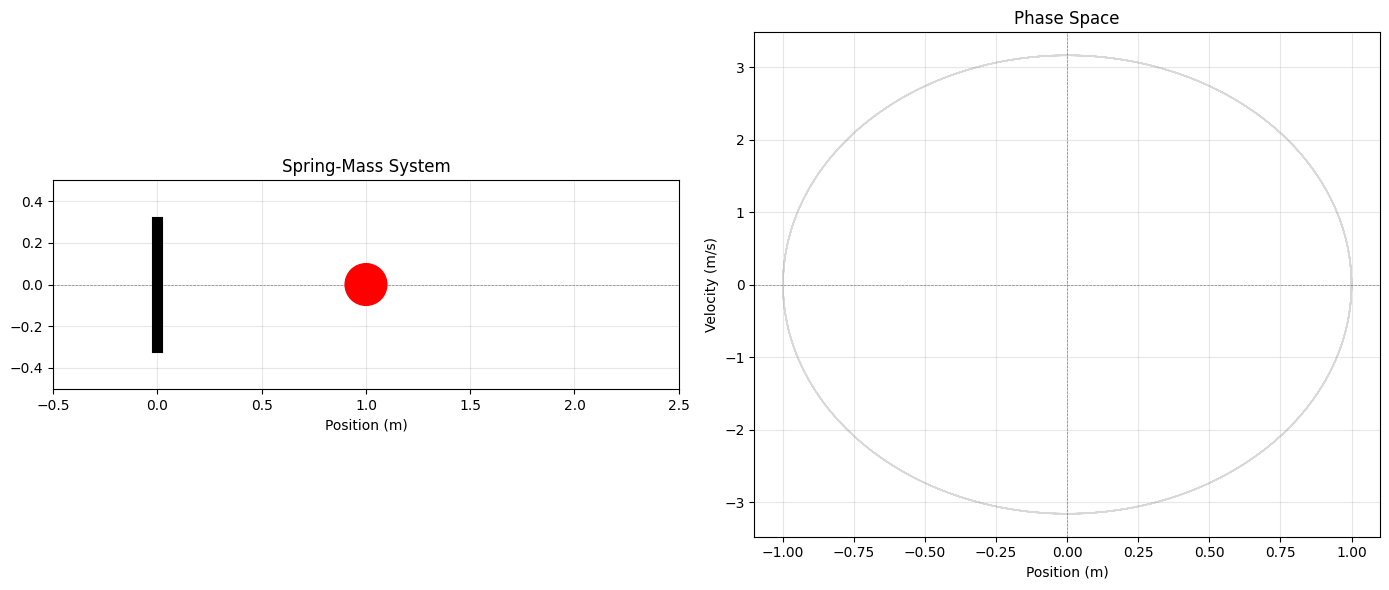

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
from scipy.integrate import odeint

# System parameters
k = 10.0  # Spring constant (N/m)
m = 1.0   # Mass (kg)
omega = np.sqrt(k/m)  # Natural frequency
c = 0.0   # Damping coefficient (set to 0 for pure SHM)

# Initial conditions
x0 = 1.0   # Initial displacement (m)
v0 = 0.0   # Initial velocity (m/s)

# Time parameters
t_max = 10.0
dt = 0.02
t = np.arange(0, t_max, dt)

# Differential equation for spring-mass system
def spring_mass(state, t):
    x, v = state
    dxdt = v
    dvdt = -(k/m)*x - (c/m)*v
    return [dxdt, dvdt]

# Solve ODE
initial_state = [x0, v0]
solution = odeint(spring_mass, initial_state, t)
x_vals = solution[:, 0]
v_vals = solution[:, 1]

# Create figure with subplots
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)  # Spring-mass animation
ax2 = plt.subplot(1, 2, 2)  # Phase space

# Setup spring-mass plot
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_aspect('equal')
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax1.set_xlabel('Position (m)')
ax1.set_title('Spring-Mass System')
ax1.grid(True, alpha=0.3)

# Wall
ax1.plot([0, 0], [-0.3, 0.3], 'k-', linewidth=8)

# Spring (zigzag pattern)
spring_width = 0.15
n_coils = 12
spring_rest_length = 1.0

def make_spring(x_mass, n_coils=12, width=0.15):
    """Generate spring coordinates"""
    x_start = 0
    spring_length = x_mass + spring_rest_length
    x_spring = np.linspace(x_start, spring_length, n_coils*2)
    y_spring = np.zeros_like(x_spring)

    for i in range(1, len(x_spring)-1):
        if i % 2 == 1:
            y_spring[i] = width if (i//2) % 2 == 0 else -width

    return x_spring, y_spring

# Initialize artists
spring_line, = ax1.plot([], [], 'b-', linewidth=2)
mass_circle = Circle((0, 0), 0.1, color='red', zorder=5)
ax1.add_patch(mass_circle)

# Setup phase space plot
max_x = np.max(np.abs(x_vals)) * 1.1
max_v = np.max(np.abs(v_vals)) * 1.1
ax2.set_xlim(-max_x, max_x)
ax2.set_ylim(-max_v, max_v)
ax2.set_xlabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')
ax2.set_title('Phase Space')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Plot full trajectory in light color
ax2.plot(x_vals, v_vals, 'gray', alpha=0.3, linewidth=1)

# Current trajectory and point
phase_line, = ax2.plot([], [], 'b-', linewidth=2)
phase_point, = ax2.plot([], [], 'ro', markersize=10, zorder=5)

# Time text
time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes,
                     verticalalignment='top', fontsize=12,
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def init():
    """Initialize animation"""
    spring_line.set_data([], [])
    mass_circle.center = (spring_rest_length, 0)
    phase_line.set_data([], [])
    phase_point.set_data([], [])
    time_text.set_text('')
    return spring_line, mass_circle, phase_line, phase_point, time_text

def animate(frame):
    """Animation function"""
    # Current position and velocity
    x = x_vals[frame]
    v = v_vals[frame]

    # Update spring
    x_spring, y_spring = make_spring(x, n_coils, spring_width)
    spring_line.set_data(x_spring, y_spring)

    # Update mass
    mass_circle.center = (x + spring_rest_length, 0)

    # Update phase space trajectory
    phase_line.set_data(x_vals[:frame+1], v_vals[:frame+1])
    phase_point.set_data([x], [v])

    # Update time
    time_text.set_text(f'Time: {t[frame]:.2f} s')

    return spring_line, mass_circle, phase_line, phase_point, time_text

# Create animation
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t),
                    interval=20, blit=True, repeat=True)

plt.tight_layout()
plt.show()

# Optional: Save animation
anim.save('spring_mass_phase_space.gif', writer='pillow', fps=30)
anim.save('spring_mass_phase_space.mp4', writer='ffmpeg', fps=30)


In [2]:
!apt-get update -qq && apt-get install -y ffmpeg

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


Creating UNDAMPED spring-mass system animation...
Creating DAMPED spring-mass system animation...

Saving animations as GIF files...

[1/2] Saving undamped_spring_mass.gif...
✓ Saved: undamped_spring_mass.gif

[2/2] Saving damped_spring_mass.gif...
✓ Saved: damped_spring_mass.gif

GIF files saved successfully!

GIF Parameters:
  - Frame rate: 25 fps
  - DPI: 100 (adjust for file size)
  - Writer: PillowWriter (no external dependencies)


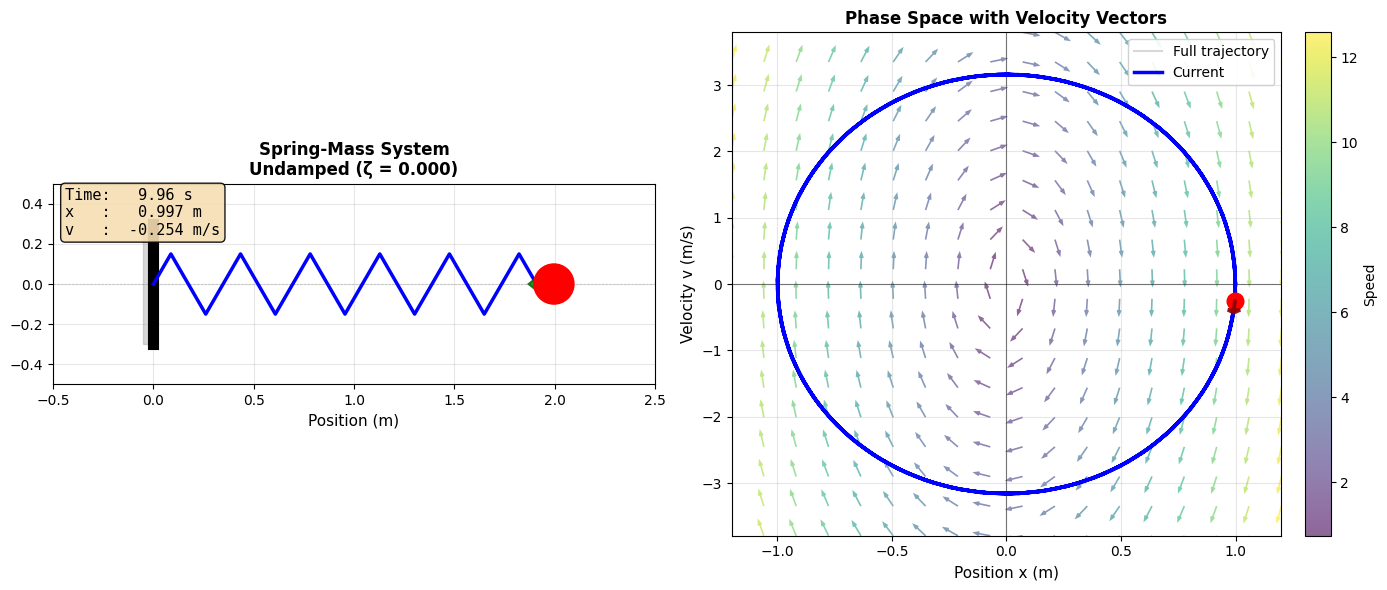

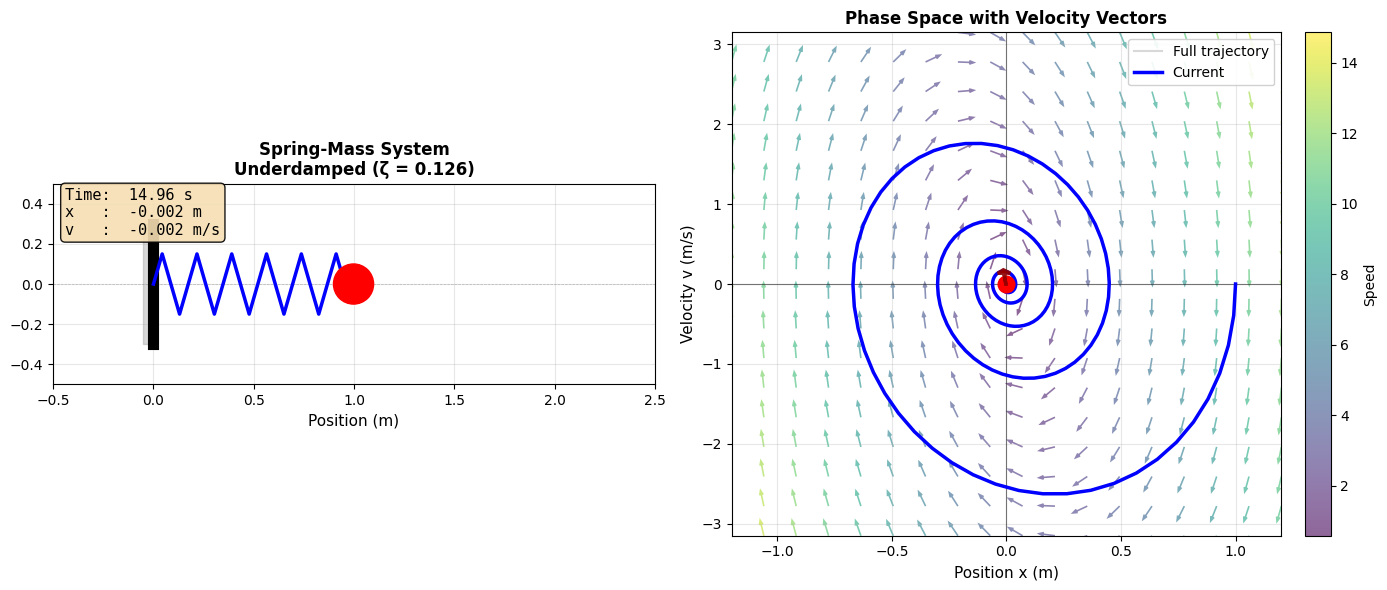

In [1]:
#!/usr/bin/env python3
"""
spring_mass_phase_space.py

Animated spring-mass system with phase space diagram and velocity vectors.
Includes GIF export functionality.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Circle
from scipy.integrate import odeint


class SpringMassSystem:
    """Spring-mass system with optional damping"""

    def __init__(self, m=1.0, k=10.0, c=0.0):
        self.m = m  # mass (kg)
        self.k = k  # spring constant (N/m)
        self.c = c  # damping coefficient (N·s/m)
        self.omega0 = np.sqrt(k/m)  # natural frequency
        self.zeta = c / (2 * np.sqrt(k*m)) if c > 0 else 0  # damping ratio

    def dynamics(self, state, t):
        """ODE: [x, v] -> [dx/dt, dv/dt]"""
        x, v = state
        dxdt = v
        dvdt = -(self.k/self.m)*x - (self.c/self.m)*v
        return [dxdt, dvdt]

    def get_velocity_field(self, x, v):
        """Get velocity field at point (x, v)"""
        return np.array([v, -(self.k/self.m)*x - (self.c/self.m)*v])

    def damping_type(self):
        """Return damping classification"""
        if self.c == 0:
            return "Undamped"
        elif self.zeta < 1:
            return "Underdamped"
        elif self.zeta == 1:
            return "Critically damped"
        else:
            return "Overdamped"


def make_spring(x_mass, n_coils=12, width=0.15, rest_length=1.0):
    """Generate spring coordinates as zigzag pattern"""
    spring_length = x_mass + rest_length
    x_spring = np.linspace(0, spring_length, n_coils*2)
    y_spring = np.zeros_like(x_spring)

    for i in range(1, len(x_spring)-1):
        if i % 2 == 1:
            y_spring[i] = width if (i//2) % 2 == 0 else -width

    return x_spring, y_spring


def animate_spring_mass_system(m=1.0, k=10.0, c=0.0, x0=1.0, v0=0.0,
                               t_max=15.0, dt=0.03, show_vector_field=True,
                               vector_density=18):
    """
    Create animated spring-mass system with phase space and velocity vectors.

    Parameters:
    -----------
    m : float - mass (kg)
    k : float - spring constant (N/m)
    c : float - damping coefficient (N·s/m), set to 0 for undamped
    x0 : float - initial position (m)
    v0 : float - initial velocity (m/s)
    t_max : float - simulation time (s)
    dt : float - time step (s)
    show_vector_field : bool - show background velocity field
    vector_density : int - density of vector field grid
    """

    # Create system
    system = SpringMassSystem(m, k, c)

    # Solve ODE
    t = np.arange(0, t_max, dt)
    initial_state = [x0, v0]
    solution = odeint(system.dynamics, initial_state, t)
    x_vals = solution[:, 0]
    v_vals = solution[:, 1]

    # Create figure with two subplots
    fig = plt.figure(figsize=(14, 6))

    # ========== Subplot 1: Physical Spring-Mass Animation ==========
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(-0.5, 0.5)
    ax1.set_aspect('equal')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    ax1.set_xlabel('Position (m)', fontsize=11)
    ax1.set_title(f'Spring-Mass System\n{system.damping_type()} (ζ = {system.zeta:.3f})',
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Wall
    ax1.plot([0, 0], [-0.3, 0.3], 'k-', linewidth=8)
    ax1.fill_between([0, -0.05], [-0.3, -0.3], [0.3, 0.3], color='gray', alpha=0.3)

    # Initialize spring and mass
    spring_line, = ax1.plot([], [], 'b-', linewidth=2.5, zorder=2)
    mass_circle = Circle((0, 0), 0.1, color='red', zorder=5)
    ax1.add_patch(mass_circle)

    # Velocity arrow on physical system
    velocity_arrow = None

    # ========== Subplot 2: Phase Space with Velocity Vectors ==========
    ax2 = plt.subplot(1, 2, 2)
    max_x = max(np.max(np.abs(x_vals)), 0.1) * 1.2
    max_v = max(np.max(np.abs(v_vals)), 0.1) * 1.2
    ax2.set_xlim(-max_x, max_x)
    ax2.set_ylim(-max_v, max_v)
    ax2.set_xlabel('Position x (m)', fontsize=11)
    ax2.set_ylabel('Velocity v (m/s)', fontsize=11)
    ax2.set_title('Phase Space with Velocity Vectors', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(0, color='k', linewidth=0.8, alpha=0.5)
    ax2.axvline(0, color='k', linewidth=0.8, alpha=0.5)

    # Plot vector field background
    if show_vector_field:
        nx, ny = vector_density, vector_density
        x_grid = np.linspace(-max_x, max_x, nx)
        v_grid = np.linspace(-max_v, max_v, ny)
        X, V = np.meshgrid(x_grid, v_grid)

        dX = np.zeros_like(X)
        dV = np.zeros_like(V)

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                vec = system.get_velocity_field(X[i, j], V[i, j])
                dX[i, j] = vec[0]
                dV[i, j] = vec[1]

        # Normalize for better visualization
        speed = np.sqrt(dX**2 + dV**2)
        speed[speed == 0] = 1  # avoid division by zero

        quiver = ax2.quiver(X, V, dX/speed, dV/speed, speed,
                           cmap='viridis', alpha=0.6, scale=30, width=0.003,
                           headwidth=3, headlength=4)
        plt.colorbar(quiver, ax=ax2, label='Speed', fraction=0.046, pad=0.04)

    # Full trajectory in light color
    ax2.plot(x_vals, v_vals, 'gray', alpha=0.3, linewidth=1.5,
            label='Full trajectory', zorder=1)

    # Current trajectory and point
    traj_line, = ax2.plot([], [], 'b-', linewidth=2.5, label='Current', zorder=3)
    current_point, = ax2.plot([], [], 'ro', markersize=12, zorder=5)

    # Velocity vector at current point (red arrow)
    velocity_vector_arrow = None

    ax2.legend(loc='upper right', fontsize=10, framealpha=0.9)

    # Time and state text
    time_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes,
                        verticalalignment='top', fontsize=11,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9),
                        family='monospace')

    def init():
        """Initialize animation"""
        spring_line.set_data([], [])
        mass_circle.center = (1.0, 0)
        traj_line.set_data([], [])
        current_point.set_data([], [])
        time_text.set_text('')
        return spring_line, mass_circle, traj_line, current_point, time_text

    def animate(frame):
        """Animation update function"""
        nonlocal velocity_arrow, velocity_vector_arrow

        # Current state
        x = x_vals[frame]
        v = v_vals[frame]
        current_t = t[frame]

        # ========== Update Physical System ==========
        # Update spring
        x_spring, y_spring = make_spring(x, n_coils=12, width=0.15, rest_length=1.0)
        spring_line.set_data(x_spring, y_spring)

        # Update mass position
        mass_circle.center = (x + 1.0, 0)

        # Remove old velocity arrow
        if velocity_arrow is not None:
            velocity_arrow.remove()

        # Draw velocity arrow on physical system (scaled for visibility)
        v_scale = 0.3
        if abs(v) > 0.01:
            velocity_arrow = ax1.arrow(x + 1.0, 0, v*v_scale, 0,
                                      head_width=0.08, head_length=0.05,
                                      fc='green', ec='darkgreen',
                                      linewidth=1.5, alpha=0.8, zorder=4)
        else:
            velocity_arrow = None

        # ========== Update Phase Space ==========
        # Update trajectory
        traj_line.set_data(x_vals[:frame+1], v_vals[:frame+1])
        current_point.set_data([x], [v])

        # Remove old velocity vector arrow
        if velocity_vector_arrow is not None:
            velocity_vector_arrow.remove()

        # Draw velocity vector at current point in phase space
        vec = system.get_velocity_field(x, v)
        vec_norm = np.linalg.norm(vec)

        if vec_norm > 1e-4:
            # Scale vector for visibility
            scale = min(max_x, max_v) * 0.15 / vec_norm
            velocity_vector_arrow = ax2.arrow(
                x, v, vec[0]*scale, vec[1]*scale,
                head_width=max_x*0.045, head_length=max_x*0.035,
                fc='red', ec='darkred', linewidth=2.5,
                alpha=0.9, zorder=6, length_includes_head=True
            )
        else:
            velocity_vector_arrow = None

        # Update time and state text
        time_text.set_text(
            f'Time: {current_t:6.2f} s\n'
            f'x   : {x:7.3f} m\n'
            f'v   : {v:7.3f} m/s'
        )

        return spring_line, mass_circle, traj_line, current_point, time_text

    # Create animation
    anim = FuncAnimation(fig, animate, init_func=init, frames=len(t),
                        interval=30, blit=False, repeat=True)

    plt.tight_layout()
    return fig, anim


# ========== Main Execution ==========
if __name__ == "__main__":

    # Example 1: UNDAMPED Spring-Mass System (Circular Phase Portrait)
    print("Creating UNDAMPED spring-mass system animation...")
    fig1, anim1 = animate_spring_mass_system(
        m=1.0, k=10.0, c=0.0,
        x0=1.0, v0=0.0,
        t_max=10.0,  # Shorter for GIF
        dt=0.04,     # Slightly larger dt for smaller GIF size
        show_vector_field=True,
        vector_density=18
    )

    # Example 2: DAMPED Spring-Mass System (Spiral Phase Portrait)
    print("Creating DAMPED spring-mass system animation...")
    fig2, anim2 = animate_spring_mass_system(
        m=1.0, k=10.0, c=0.8,
        x0=1.0, v0=0.0,
        t_max=15.0,
        dt=0.04,
        show_vector_field=True,
        vector_density=18
    )

    # ========== SAVE AS GIF ==========
    print("\n" + "="*60)
    print("Saving animations as GIF files...")
    print("="*60)

    # Method 1: Simple save (uses Pillow by default for .gif extension)
    print("\n[1/2] Saving undamped_spring_mass.gif...")
    anim1.save('undamped_spring_mass.gif', writer='pillow', fps=25, dpi=100)
    print("✓ Saved: undamped_spring_mass.gif")

    # Method 2: Using PillowWriter with custom settings
    print("\n[2/2] Saving damped_spring_mass.gif...")
    writer = PillowWriter(fps=25, metadata=dict(artist='Physics Simulation'), bitrate=1800)
    anim2.save('damped_spring_mass.gif', writer=writer, dpi=100)
    print("✓ Saved: damped_spring_mass.gif")

    print("\n" + "="*60)
    print("GIF files saved successfully!")
    print("="*60)
    print("\nGIF Parameters:")
    print("  - Frame rate: 25 fps")
    print("  - DPI: 100 (adjust for file size)")
    print("  - Writer: PillowWriter (no external dependencies)")

    plt.show()
